PYMACEUTICALS

In [215]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import itertools

In [216]:
# Files path
mouse_drug_data_to_load = "./Resources/Mouse_metadata.csv"
clinical_trial_data_to_load = "./Resources/Study_results.csv"

# Read data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)


In [217]:
#merge databases
clinical_data_complete = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID","Mouse ID"])

clinical_data_complete.head(5)





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Initial Statistics

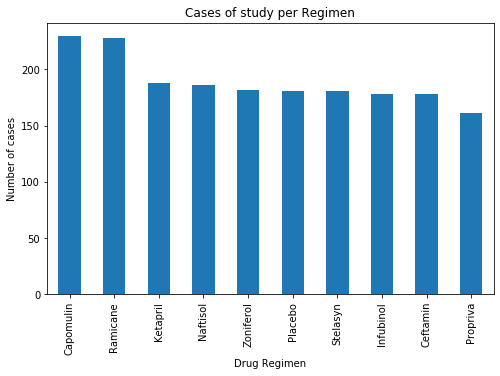

In [245]:
# GRAPH 1 - Scatter plot of tumor changes over time for each treatment

#total cases per Drug
counts = complete_data["Drug Regimen"].value_counts()
plt.figure(figsize=(8,5))
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of cases")
plt.title("Cases of study per Regimen")
plt.savefig("./Analysis/Cases_of_study.png")

In [219]:
##Tumor volume changes over time per Drug Regimen

In [220]:
# MEAN Tumor volume changes over time per treatment

data_by_drug_mean = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).mean()["Tumor Volume (mm3)"]

data_by_drug_mean = pd.DataFrame(data_by_drug_mean)

data_by_drug_mean = data_by_drug_mean.reset_index()
data_by_drug_mean = data_by_drug_mean.set_index('Drug Regimen')

data_by_drug_mean


,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,0,45.000000
Capomulin,5,44.266086
Capomulin,10,43.084291
Capomulin,15,42.064317
Capomulin,20,40.716325
...,...,...
Zoniferol,25,55.432935
Zoniferol,30,57.713531
Zoniferol,35,60.089372


In [221]:
# SEM Tumor volume changes over time per treatment

data_by_drug_sem = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).sem()["Tumor Volume (mm3)"]

data_by_drug_sem = pd.DataFrame(data_by_drug_sem)

data_by_drug_sem = data_by_drug_sem.reset_index()
data_by_drug_sem = data_by_drug_sem.set_index('Drug Regimen')


data_by_drug_sem

,Timepoint,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,0,0.000000
Capomulin,5,0.448593
Capomulin,10,0.702684
Capomulin,15,0.838617
Capomulin,20,0.909731
...,...,...
Zoniferol,25,0.602513
Zoniferol,30,0.800043
Zoniferol,35,0.881426


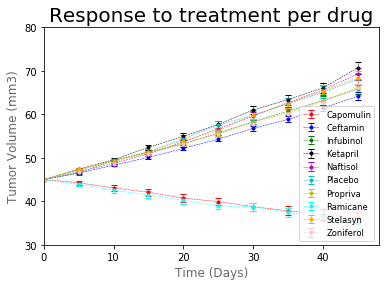

In [240]:
#scatter plot

#Capomulin
data_by_drug_mean_Capomulin = data_by_drug_mean.loc[data_by_drug_mean.index == "Capomulin"]
data_by_drug_sem_Capomulin = data_by_drug_sem.loc[data_by_drug_mean.index == "Capomulin"]

plt.errorbar(data_by_drug_mean_Capomulin['Timepoint'], data_by_drug_mean_Capomulin['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Capomulin['Tumor Volume (mm3)'], marker="o", color="r", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Capomulin")

#Ceftamin
data_by_drug_mean_Ceftamin = data_by_drug_mean.loc[data_by_drug_mean.index == "Ceftamin"]
data_by_drug_sem_Ceftamin = data_by_drug_sem.loc[data_by_drug_sem.index == "Ceftamin"]

plt.errorbar(data_by_drug_mean_Ceftamin['Timepoint'], data_by_drug_mean_Ceftamin['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Ceftamin['Tumor Volume (mm3)'], marker="o", color="b", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Ceftamin")

#Infubinol
data_by_drug_mean_Infubinol = data_by_drug_mean.loc[data_by_drug_mean.index == "Infubinol"]
data_by_drug_sem_Infubinol = data_by_drug_sem.loc[data_by_drug_sem.index == "Infubinol"]

plt.errorbar(data_by_drug_mean_Infubinol['Timepoint'], data_by_drug_mean_Infubinol['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Infubinol['Tumor Volume (mm3)'], marker="o", color="g", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Infubinol")

#Ketapril
data_by_drug_mean_Ketapril = data_by_drug_mean.loc[data_by_drug_mean.index == "Ketapril"]
data_by_drug_sem_Ketapril = data_by_drug_sem.loc[data_by_drug_sem.index == "Ketapril"]

plt.errorbar(data_by_drug_mean_Ketapril['Timepoint'], data_by_drug_mean_Ketapril['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Ketapril['Tumor Volume (mm3)'], marker="o", color="k", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Ketapril")

#Naftisol
data_by_drug_mean_Naftisol = data_by_drug_mean.loc[data_by_drug_mean.index == "Naftisol"]
data_by_drug_sem_Naftisol = data_by_drug_sem.loc[data_by_drug_sem.index == "Naftisol"]

plt.errorbar(data_by_drug_mean_Naftisol['Timepoint'], data_by_drug_mean_Naftisol['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Naftisol['Tumor Volume (mm3)'], marker="o", color="m", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Naftisol")

#Placebo
data_by_drug_mean_Placebo = data_by_drug_mean.loc[data_by_drug_mean.index == "Placebo"]
data_by_drug_sem_Placebo = data_by_drug_sem.loc[data_by_drug_sem.index == "Placebo"]

plt.errorbar(data_by_drug_mean_Placebo['Timepoint'], data_by_drug_mean_Placebo['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Placebo['Tumor Volume (mm3)'], marker="o", color="c", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Placebo")

#Propriva
data_by_drug_mean_Propriva = data_by_drug_mean.loc[data_by_drug_mean.index == "Propriva"]
data_by_drug_sem_Propriva = data_by_drug_sem.loc[data_by_drug_sem.index == "Propriva"]

plt.errorbar(data_by_drug_mean_Propriva['Timepoint'], data_by_drug_mean_Propriva['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Propriva['Tumor Volume (mm3)'], marker="o", color="y", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Propriva")

#Ramicane
data_by_drug_mean_Ramicane = data_by_drug_mean.loc[data_by_drug_mean.index == "Ramicane"]
data_by_drug_sem_Ramicane = data_by_drug_sem.loc[data_by_drug_sem.index == "Ramicane"]

plt.errorbar(data_by_drug_mean_Ramicane['Timepoint'], data_by_drug_mean_Ramicane['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Ramicane['Tumor Volume (mm3)'], marker="o", color="aqua", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Ramicane")

#Stelasyn
data_by_drug_mean_Stelasyn = data_by_drug_mean.loc[data_by_drug_mean.index == "Stelasyn"]
data_by_drug_sem_Stelasyn = data_by_drug_sem.loc[data_by_drug_sem.index == "Stelasyn"]

plt.errorbar(data_by_drug_mean_Stelasyn['Timepoint'], data_by_drug_mean_Stelasyn['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Stelasyn['Tumor Volume (mm3)'], marker="o", color="orange", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Stelasyn")

#Zoniferol
data_by_drug_mean_Zoniferol = data_by_drug_mean.loc[data_by_drug_mean.index == "Zoniferol"]
data_by_drug_sem_Zoniferol = data_by_drug_sem.loc[data_by_drug_sem.index == "Zoniferol"]

plt.errorbar(data_by_drug_mean_Zoniferol['Timepoint'], data_by_drug_mean_Zoniferol['Tumor Volume (mm3)'], yerr=data_by_drug_sem_Zoniferol['Tumor Volume (mm3)'], marker="o", color="pink", markersize=3,linestyle="dashed", linewidth=0.50, capsize=3, label="Zoniferol")


plt.xlabel('Time (Days)',fontsize=12,color='#696969')
plt.ylabel('Tumor Volume (mm3)',fontsize=12,color='#696969')
plt.title("Response to treatment per drug", fontsize=20)
plt.ylim(30,80)
plt.xlim(0,48)
plt.legend(loc="best", fontsize="small", fancybox = True)

plt.savefig("./Analysis/Treatment_response.png")
plt.show()



METASTATIC VALUES OVER TIME

In [223]:
#MEtas

#define variables:
met_sites_mean = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).mean()["Metastatic Sites"]

met_sites_mean = pd.DataFrame(met_sites_mean)
met_sites_mean.head(5)

Metastatic Sites
Drug Regimen Timepoint                  
Capomulin    0                  0.000000
             5                  0.160000
             10                 0.320000
             15                 0.375000
             20                 0.652174

In [224]:
#define variables:
met_sites_sem = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).sem()["Metastatic Sites"]

met_sites_sem = pd.DataFrame(met_sites_sem)
met_sites_sem.head(5)


Metastatic Sites
Drug Regimen Timepoint                  
Capomulin    0                  0.000000
             5                  0.074833
             10                 0.125433
             15                 0.132048
             20                 0.161621

In [225]:
#change index and create pivot
met_sites_mean = met_sites_mean.reset_index()
met_sites_mean_pivot = met_sites_mean.pivot(index="Timepoint",columns="Drug Regimen")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_sem_pivot = met_sites_sem.pivot(index="Timepoint",columns="Drug Regimen")["Metastatic Sites"]

met_sites_mean_pivot.head(5)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


In [226]:
met_sites_sem_pivot.head(5)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.222607,0.166378


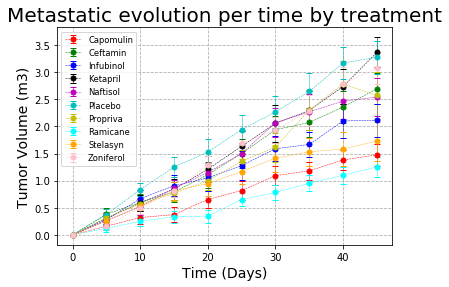

In [241]:

#Capomulin
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Capomulin"], yerr=met_sites_sem_pivot["Capomulin"], marker="o", color="r", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Capomulin")

#Ceftamin
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Ceftamin"], yerr=met_sites_sem_pivot["Ceftamin"], marker="o", color="g", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Ceftamin")

#Infubinol
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Infubinol"], yerr=met_sites_sem_pivot["Infubinol"], marker="o", color="b", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Infubinol")

#Ketapril
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Ketapril"], yerr=met_sites_sem_pivot["Ketapril"], marker="o", color="k", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Ketapril")

#Naftisol
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Naftisol"], yerr=met_sites_sem_pivot["Naftisol"], marker="o", color="m", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Naftisol")

#Placebo
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Placebo"], yerr=met_sites_sem_pivot["Placebo"], marker="o", color="c", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Placebo")

#Propriva
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Propriva"], yerr=met_sites_sem_pivot["Propriva"], marker="o", color="y", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Propriva")

#Ramicane
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Ramicane"], yerr=met_sites_sem_pivot["Ramicane"], marker="o", color="aqua", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Ramicane")

#Stelasyn
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Stelasyn"], yerr=met_sites_sem_pivot["Stelasyn"], marker="o", color="orange", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Stelasyn")

#Zoniferol
plt.errorbar(met_sites_mean_pivot.index, met_sites_mean_pivot["Zoniferol"], yerr=met_sites_sem_pivot["Zoniferol"], marker="o", color="pink", markersize=5,linestyle="dashed", linewidth=0.50, capsize=3, label="Zoniferol")


plt.title("Metastatic evolution per time by treatment", fontsize=20)
plt.ylabel("Tumor Volume (m3)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed")
plt.legend(loc="best", fontsize="small", fancybox = True)

plt.savefig("./Analysis/Metastatic_evolution.png")
plt.show()


SURVIVAL RATE

In [228]:
#create variables

mouse_count = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).count()["Tumor Volume (mm3)"]

mouse_count = pd.DataFrame({"Mouse Count": mouse_count})

mouse_count = mouse_count.reset_index()
mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug Regimen")["Mouse Count"]

mouse_count_pivot



Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,24,25
5,25,21,25,23,23,24,25,25,23,24
10,25,20,21,22,21,24,23,24,21,22
15,24,19,21,19,21,20,17,24,21,21
20,23,18,20,19,20,19,17,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


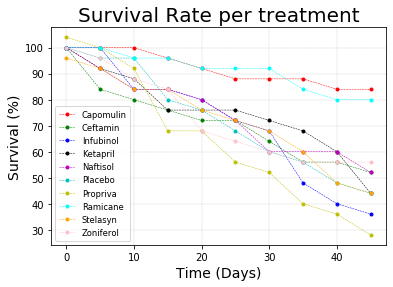

In [242]:
#plot
plt.plot(100 * mouse_count_pivot["Capomulin"]/25, marker="o", color="r",linestyle="dashed", markersize=3, linewidth=0.50, label="Capomulin")
plt.plot(100 * mouse_count_pivot["Ceftamin"]/25, marker="o", color="g",linestyle="dashed", markersize=3, linewidth=0.50, label="Ceftamin")
plt.plot(100 * mouse_count_pivot["Infubinol"]/25, marker="o", color="b",linestyle="dashed", markersize=3, linewidth=0.50, label="Infubinol")
plt.plot(100 * mouse_count_pivot["Ketapril"]/25, marker="o", color="k",linestyle="dashed", markersize=3, linewidth=0.50, label="Ketapril")
plt.plot(100 * mouse_count_pivot["Naftisol"]/25, marker="o", color="m",linestyle="dashed", markersize=3, linewidth=0.50, label="Naftisol")
plt.plot(100 * mouse_count_pivot["Placebo"]/25, marker="o", color="c",linestyle="dashed", markersize=3, linewidth=0.50, label="Placebo")
plt.plot(100 * mouse_count_pivot["Propriva"]/25, marker="o", color="y",linestyle="dashed", markersize=3, linewidth=0.50, label="Propriva")
plt.plot(100 * mouse_count_pivot["Ramicane"]/25, marker="o", color="aqua",linestyle="dashed", markersize=3, linewidth=0.50, label="Ramicane")
plt.plot(100 * mouse_count_pivot["Stelasyn"]/25, marker="o", color="orange",linestyle="dashed", markersize=3, linewidth=0.50, label="Stelasyn")
plt.plot(100 * mouse_count_pivot["Zoniferol"]/25, marker="o", color="pink", linestyle="dashed", markersize=3, linewidth=0.50, label="Zoniferol")


plt.title("Survival Rate per treatment", fontsize=20)
plt.ylabel("Survival (%)", fontsize=14)
plt.xlabel("Time (Days)", fontsize=14)
plt.grid(linestyle="dashed", linewidth=0.3)
plt.legend(loc="best", fontsize="small", fancybox = True)

plt.savefig("./Analysis/Survival_Rate.png")
plt.show()



In [230]:
# Tumor change

#define variables and create pivot:
tumor_vols_mean = clinical_data_complete.groupby(["Drug Regimen","Timepoint"]).mean()["Tumor Volume (mm3)"]
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_mean_pivot = tumor_vols_mean.pivot(index="Timepoint",columns="Drug Regimen")["Tumor Volume (mm3)"]

tumor_vols_mean_pivot.head(5)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


In [231]:
tumor_change = 100 * (tumor_vols_mean_pivot.iloc[-1] - tumor_vols_mean_pivot.iloc[0]) / tumor_vols_mean_pivot.iloc[0]

tumor_change

Drug Regimen
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [232]:
change = (tumor_change["Capomulin"],tumor_change["Ceftamin"],tumor_change["Infubinol"],tumor_change["Ketapril"],tumor_change["Naftisol"],tumor_change["Placebo"],tumor_change["Propriva"],tumor_change["Ramicane"],tumor_change["Stelasyn"],tumor_change["Zoniferol"])

change

(-19.475302666666657,
 42.51649185811964,
 46.123471728395046,
 57.02879468484848,
 53.92334713675214,
 51.29796048484849,
 47.24117486349207,
 -22.320900462222223,
 52.085134290909075,
 46.57975086507936)

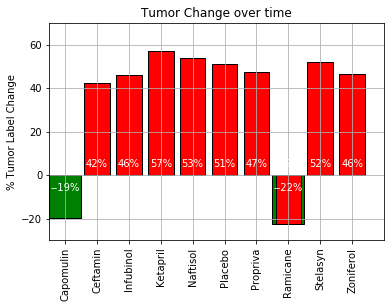

In [243]:
fig, ax = plt.subplots()
ind = np.arange (len(change))
width=1
rectsPass = ax.bar(ind[0], change[0], width, color="green", ec="black")
rectsPass2 = ax.bar(ind[7], change[7], width, color="green", ec="black")
rectsFail = ax.bar(ind[1:], change[1:], color="red", ec="black")

ax.set_ylabel('% Tumor Label Change')
ax.set_title('Tumor Change over time')
ax.set_xticks(ind)
ax.set_xticklabels (('Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'),rotation=90)
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.set_xlim([-0.5,10])
ax.grid(True)

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
            '%d%%' % int(height),
            ha='center', va='bottom', color='white')


def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
            '-%d%%' % int(height),
            ha='center', va='bottom', color='white')


def autolabelPass2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
            '-%d%%' % int(height),
            ha='center', va='bottom', color='white')


autolabelPass(rectsPass)
autolabelPass2(rectsPass2)
autolabelFail(rectsFail)

plt.savefig("./Analysis/Tumor_changes.png")
plt.show()

